### Data Visualization: Shots 
In this notebook we will try to extract insights out of shots data of the World Cup 2022.

1. Shots Map 

##### Imports 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
from mplsoccer import VerticalPitch, pitch, FontManager 

In [2]:
#Read shots data
df= pd.read_parquet('../data/shots.parquet')

1. Shots Map

In [3]:
# Filter data 
df[['X', 'Y']]= pd.DataFrame(df.location.to_list(), index= df.index) # Add shots locaiton (X,Y)
df= df.loc[df.period!=5] # Exclude penalty shoot-outs shots
df.shot_outcome.replace({'Goal': 1}, inplace= True) # Asign 1 to 'Goal'
df.shot_outcome[df.shot_outcome!= 1]= 0 

# Players cumulative xG and numbre of goals
DF= df.groupby(['player_id', 'player'])\
        .agg({'shot_statsbomb_xg': 'sum', 'shot_outcome': 'sum'})\
        .sort_values(by='shot_statsbomb_xg', ascending= False).reset_index()
DF.head(3)

C:\Users\pc\AppData\Local\Temp\ipykernel_4956\3847802881.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.shot_outcome[df.shot_outcome!= 1]= 0


,player_id,player,shot_statsbomb_xg,shot_outcome
0,5503,Lionel Andrés Messi Cuccittini,6.031649,7
1,3009,Kylian Mbappé Lottin,4.233252,8
2,5668,Robert Lewandowski,3.125918,2


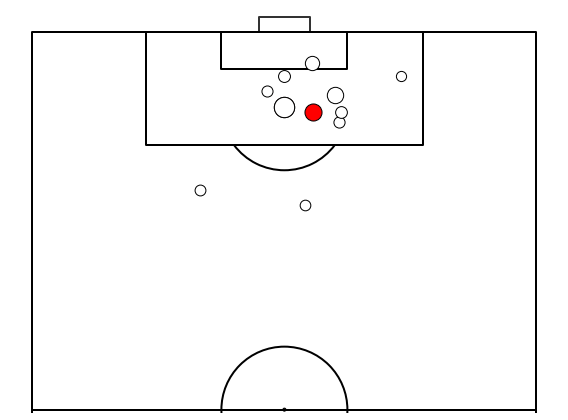

In [17]:
#Plotting
pitch = VerticalPitch(pitch_type= 'statsbomb',pad_bottom=0.5, half= True, goal_type= 'box', goal_alpha=0.8,  line_color='black') 
fig, ax = pitch.draw(figsize=(8, 10))

df1= df.loc[df['player']== DF.player[2]]

result= df1['shot_outcome'].values.tolist()
X_s= df1['X'].values.tolist()
Y_s= df1['Y'].values.tolist()
xG_s= df1['shot_statsbomb_xg'].values.tolist()

# Scatter shots 
for r, x, y, xG in zip(result, X_s, Y_s, xG_s):
    if r == 1:
        pitch.scatter(x, y, c='red', s=(xG* 400) + 100,
                      edgecolors='black', ax=ax)
    else:
        pitch.scatter(x, y, c='white', s=(xG* 400) + 100,
                      edgecolors='black', ax=ax)